In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/INST414")

In [3]:
import pandas as pd
df= pd.read_csv("birds_arent_real_tweets.csv")
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1472051709400817665,Birds Aren't Real,NaN,They used to be. Until the U.S. Government rep...,2017-08-18 14:27:04,74846,133,1093,False,2021-12-18 03:50:51,More soon. We are obviously not happy about th...,NaN,Twitter for iPhone,4,90,False
1,1471634334717288452,Birds Aren't Real,NaN,They used to be. Until the U.S. Government rep...,2017-08-18 14:27:04,74846,133,1093,False,2021-12-17 00:12:21,@Ry_Too_D2 @ClickHole Really one of the only j...,NaN,Twitter for iPhone,0,1,False
2,1471633095799545856,Birds Aren't Real,NaN,They used to be. Until the U.S. Government rep...,2017-08-18 14:27:04,74846,133,1093,False,2021-12-17 00:07:26,@NyTulsi Distorting.,NaN,Twitter for iPhone,0,0,False
3,1471632068761243655,Birds Aren't Real,NaN,They used to be. Until the U.S. Government rep...,2017-08-18 14:27:04,74846,133,1093,False,2021-12-17 00:03:21,@NyTulsi We try not to curse but I understand ...,NaN,Twitter for iPhone,0,5,False
4,1471632012935053333,Birds Aren't Real,NaN,They used to be. Until the U.S. Government rep...,2017-08-18 14:27:04,74846,133,1093,False,2021-12-17 00:03:08,@ReinsPhoenix Stay safe.,NaN,Twitter for iPhone,0,4,False


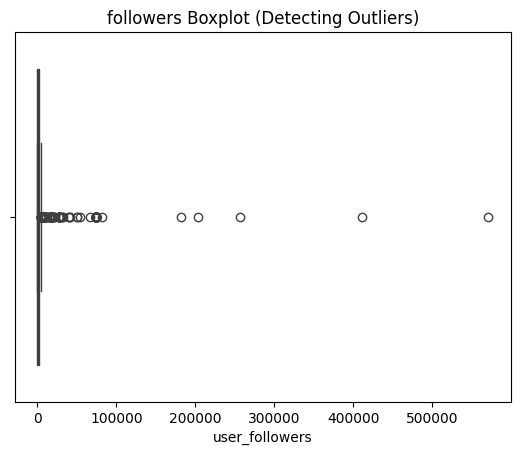

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df["user_followers"])
plt.title("followers Boxplot (Detecting Outliers)")
plt.show()

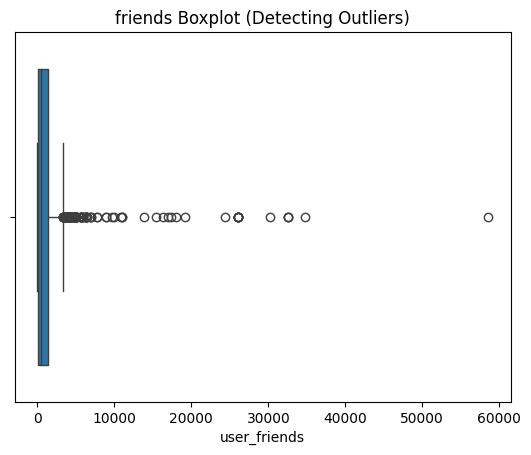

In [5]:
sns.boxplot(x=df["user_friends"])
plt.title("friends Boxplot (Detecting Outliers)")
plt.show()

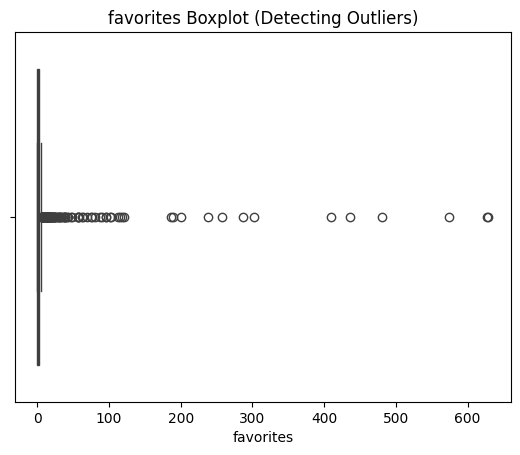

In [6]:
sns.boxplot(x=df["favorites"])
plt.title("favorites Boxplot (Detecting Outliers)")
plt.show()

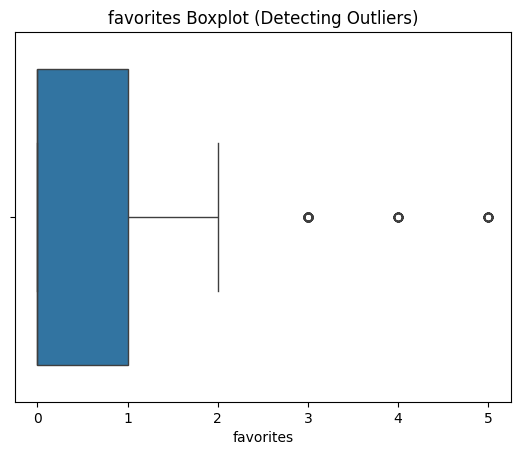

In [7]:
favorite_q1= df["favorites"].quantile(0.25)
favorite_q3= df["favorites"].quantile(0.75)
favorite_iqr= favorite_q3-favorite_q1
favorite_lowerbound= favorite_q1-1.5*favorite_iqr
favorite_upperbound= favorite_q3+1.5*favorite_iqr
df= df[(df["favorites"] >= favorite_lowerbound) & (df["favorites"] <= favorite_upperbound)]
sns.boxplot(x=df["favorites"])
plt.title("favorites Boxplot (Detecting Outliers)")
plt.show()

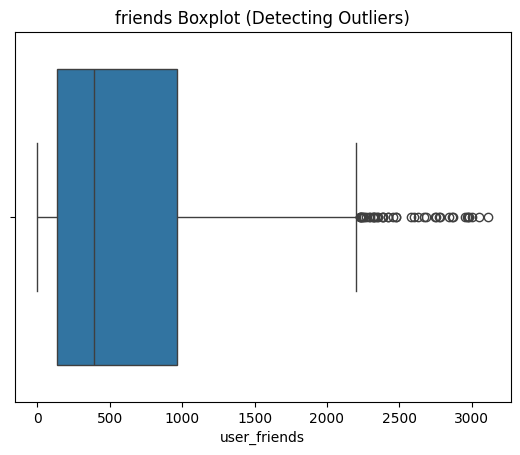

In [8]:
friend_q1= df["user_friends"].quantile(0.25)
friend_q3= df["user_friends"].quantile(0.75)
friend_iqr= friend_q3-friend_q1
friend_lowerbound= friend_q1-1.5*friend_iqr
friend_upperbound= friend_q3+1.5*friend_iqr
df= df[(df["user_friends"] >= friend_lowerbound) & (df["user_friends"] <= friend_upperbound)]
sns.boxplot(x=df["user_friends"])
plt.title("friends Boxplot (Detecting Outliers)")
plt.show()

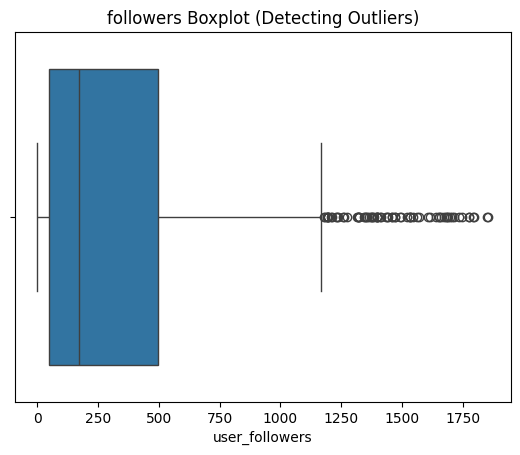

In [9]:
follower_q1= df["user_followers"].quantile(0.25)
follower_q3= df["user_followers"].quantile(0.75)
follower_iqr= follower_q3-follower_q1
follower_lowerbound= follower_q1-1.5*follower_iqr
follower_upperbound= follower_q3+1.5*follower_iqr
df= df[(df["user_followers"] >= follower_lowerbound) & (df["user_followers"] <= follower_upperbound)]
sns.boxplot(x=df["user_followers"])
plt.title("followers Boxplot (Detecting Outliers)")
plt.show()

In [10]:
acc_char_vars= df.select_dtypes(include=["object"])
for col in acc_char_vars.columns:
  display(acc_char_vars[col].value_counts().reset_index())

,user_name,count
0,Leon Jaron,17
1,Pigeonsareliars,16
2,notrealbirds,12
3,Cosmic Indifference ⚛,12
4,Tim Fuller,8
...,...,...
628,Steven ♿️ Martin 🏳️‍🌈,1
629,kussaundracomplex,1
630,Jim Squires,1
631,David Drexler,1


,user_location,count
0,florida,17
1,"Ellicott City, MD",12
2,"Chicago, IL",10
3,"Los Angeles, CA",9
4,"Connecticut, USA",9
...,...,...
389,Colorado,1
390,Where I always am,1
391,"St. Catharines, Ontario",1
392,"Indiana, USA",1


,user_description,count
0,"I am not a “well adjusted”, not “legacy Americ...",17
1,Birds are not real. They are drones made by th...,16
2,Not Real Birds,12
3,"Independent, disabled combat vet, formerly NSA...",12
4,Mom always told me I was special and I believe...,8
...,...,...
573,She/her. #BlackLivesMatter Linda from HR. Chim...,1
574,world domination consultant | antifa comedy ...,1
575,"East Coast blood, Midwest heart. Reader, write...",1
576,"I only use this account for art , shit posts a...",1


,user_created,count
0,2012-03-18 12:41:27,17
1,2021-12-11 04:50:59,16
2,2021-12-14 00:42:48,12
3,2020-09-23 12:53:02,12
4,2009-04-19 22:13:54,8
...,...,...
628,2021-11-11 22:14:25,1
629,2020-12-25 23:42:23,1
630,2009-04-06 17:13:25,1
631,2008-08-07 23:44:47,1


,date,count
0,2022-01-18 06:18:06,1
1,2021-12-18 03:47:37,1
2,2021-12-14 23:37:55,1
3,2021-12-14 23:21:43,1
4,2021-12-14 22:57:35,1
...,...,...
787,2021-12-14 18:03:12,1
788,2021-12-14 18:16:06,1
789,2021-12-14 18:45:11,1
790,2021-12-14 18:56:40,1


,text,count
0,@NYTNational @CarolYMorrisse1 #birdsarentreal ...,2
1,Of all the things wrong with #MassEffectAndrom...,1
2,Hilarious. Genius. Birds Aren't Real Movement ...,1
3,@YesItsDyl Nah they just ran out of battery li...,1
4,@MikeDel21893959 @Anonylyzer13 @fishyfish67 @a...,1
...,...,...
786,After BLM now Bird’s aren’t real again the gov...,1
787,How many #QAnonCult suckers have signed up to ...,1
788,An great way to cope with the surrounding madn...,1
789,"Birds Aren’t Real, or Are They? Inside a Gen Z...",1


,hashtags,count
0,['birdsarentreal'],432
1,['BirdsArentReal'],54
2,"['birdsarentreal', 'notrealbirds', 'birds', 'a...",12
3,"['NationalBirdDay', 'birdsarentreal']",3
4,"['birdsarentreal', 'birdwatchinggoesbothways']",2
...,...,...
147,"['birdsarentreal', 'Bitcoin']",1
148,"['Srinagar', 'Kashmir', 'birds', 'Birdsofparad...",1
149,"['PS5Share', 'AssassinsCreedOdyssey', 'BirdsAr...",1
150,['Batman'],1


,source,count
0,Twitter for iPhone,317
1,Twitter Web App,213
2,Twitter for Android,197
3,Twitter for iPad,25
4,artspark.io,12
5,TweetDeck,4
6,Buffer,2
7,LinkedIn,2
8,Instagram,2
9,Hootsuite Inc.,2


In [ ]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,7.920000e+02,792.000000,792.000000,792.000000,792.000000,792.000000
mean,1.474811e+18,362.635101,628.195707,13850.954545,0.106061,0.751263
std,5.273224e+15,441.074423,655.079384,27256.284384,0.475826,1.168486
min,1.469084e+18,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.469824e+18,47.000000,129.000000,533.750000,0.000000,0.000000
50%,1.472611e+18,170.000000,392.000000,3635.000000,0.000000,0.000000
75%,1.479546e+18,497.500000,940.250000,14388.250000,0.000000,1.000000
max,1.486257e+18,1856.000000,3115.000000,247070.000000,7.000000,5.000000


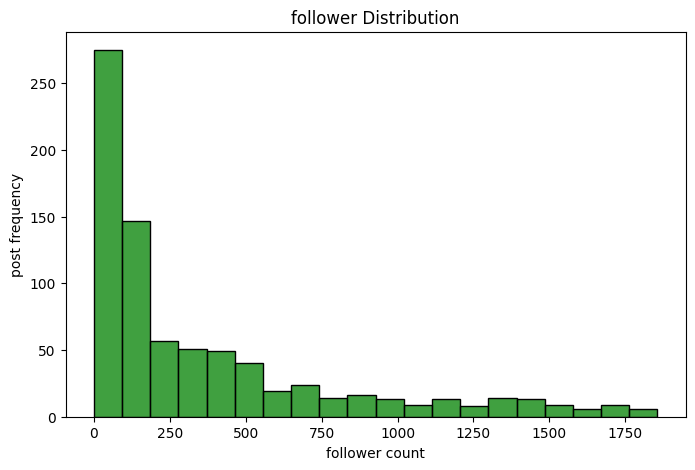

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(data= df, x= "user_followers", bins= 20, color= "green")
plt.title("follower Distribution")
plt.xlabel("follower count")
plt.ylabel("post frequency")
plt.show()

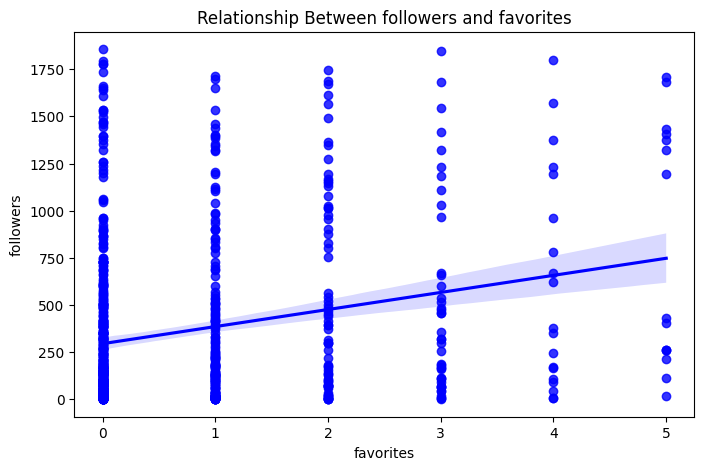

In [12]:
plt.figure(figsize=(8, 5))
sns.regplot(data= df, x= "favorites", y= "user_followers", color= "blue")
plt.title("Relationship Between followers and favorites")
plt.xlabel("favorites")
plt.ylabel("followers")
plt.show()

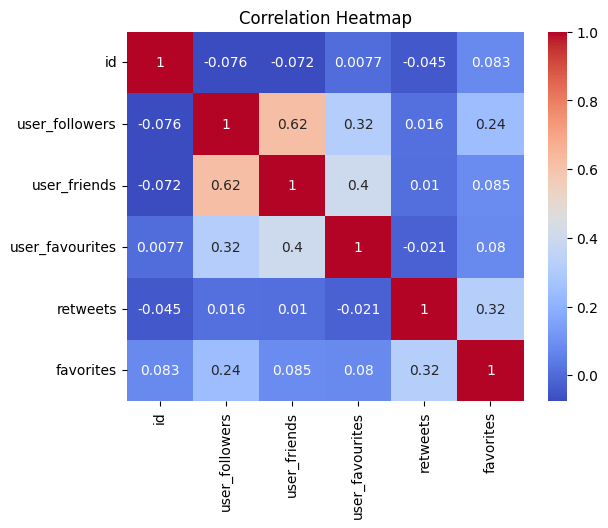

In [13]:
acc_numeric= df.select_dtypes(include=["number"])
sns.heatmap(acc_numeric.corr(), annot= True, cmap= "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
from scipy.stats import mannwhitneyu
verified_users = df[df['user_verified'] == 1]['user_followers']
non_verified_users = df[df['user_verified'] == 0]['user_followers']
stat, p_value = mannwhitneyu(verified_users, non_verified_users, alternative='two-sided')
print(f"Test statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between verified and non-verified users' followers.")
else:
    print("There is no significant difference between verified and non-verified users' followers.")

Test statistic: 2768.5
P-value: 0.009004730309766716
There is a significant difference between verified and non-verified users' followers.


In [15]:
from scipy.stats import pointbiserialr
correlation, p_value = pointbiserialr(df['user_verified'], df['user_followers'])
print(f"Point-biserial correlation: {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    if correlation > 0:
        print("There is a significant positive correlation: Verified users tend to have more followers.")
    elif correlation < 0:
        print("There is a significant negative correlation: Verified users tend to have fewer followers.")
    else:
        print("There is no significant correlation.")
else:
    print("There is no significant correlation between being verified and the number of followers.")

Point-biserial correlation: 0.10924190204682269
P-value: 0.002079043719775074
There is a significant positive correlation: Verified users tend to have more followers.


In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import poisson
df['user_verified'] = df['user_verified'].astype(int)
poisson_model = poisson('favorites ~ user_verified', data=df).fit()
print(poisson_model.summary())


Optimization terminated successfully.
         Current function value: 1.291759
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:              favorites   No. Observations:                  792
Model:                        Poisson   Df Residuals:                      790
Method:                           MLE   Df Model:                            1
Date:                Sun, 27 Apr 2025   Pseudo R-squ.:                0.001891
Time:                        18:28:38   Log-Likelihood:                -1023.1
converged:                       True   LL-Null:                       -1025.0
Covariance Type:            nonrobust   LLR p-value:                   0.04899
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.2928      0.041     -7.099      0.000      -0.374      -0.212
user_verified     0.